# Walmart Recruiting II: Sales in Stormy Weather

- 타겟 데이터
    - `units` : 주어진 날짜에 판매 된 수량
    - 주요 기상 이변시기에 walmart의 지점 45곳에서 판매된 날씨에 민감한 111가지 제품의 양을 예측
    - 예측기간은 `2013-04-01 ~ 2014-10-26`
- 특징 데이터
    - `date` : 2012-01-01 ~ 2013-03-31 사이의 판매일
    - `store_nbr` : 45개의 지점 중 하나를 나타내는 ID
    - `station_nbr` : 20개의 기상 관측소 중 하나를 나타내는 ID
    - `item_nbr` : 111가지 제품 중 하나를 나타내는 ID
    - `tmax` : 최고기온
    - `tmin` : 최저기온
    - `tavg` : 평균기온
    - `depart` : (정상범위에서) 온도 편차
    - `dewpoint` : 평균이슬점
    - `wetbulb` : 평균습구
    - `heat` : 뜨거운 기후, 열기 (계절은 7 월과 함께 시작)
    - `cool` :	서늘한 기후 (계절은 1 월과 함께 시작)
    - `sunrise` : 일출 (계산 됨, 관찰되지 않음)
    - `sunset` : 일몰 (계산 됨, 관찰되지 않음)	
    - `codesum` : 중요한 기상 유형 (기상현상 코드화)
    - `snowfall` : 강설량 (T = ?, M = 데이터 누락)
    - `preciptotal` : 강수량 (T = ?, M = 데이터 누락)
    - `stnpressure` : 평균 관측소 기압
    - `sealevel` : 평균 해면기압
    - `resultspeed` : 합성풍속
    - `resultdir` :	합성풍향
    - `avgspeed` : 평균풍속

In [17]:
# train.csv 
wal = pd.read_csv('train.csv')
wal_train = wal.loc[:2255852]
wal_train

date  store_nbr  item_nbr  units
0        2012-01-01          1         1      0
1        2012-01-01          1         2      0
2        2012-01-01          1         3      0
3        2012-01-01          1         4      0
4        2012-01-01          1         5      0
5        2012-01-01          1         6      0
6        2012-01-01          1         7      0
7        2012-01-01          1         8      0
8        2012-01-01          1         9     29
9        2012-01-01          1        10      0
10       2012-01-01          1        11      0
11       2012-01-01          1        12      0
12       2012-01-01          1        13      0
13       2012-01-01          1        14      0
14       2012-01-01          1        15      0
15       2012-01-01          1        16      0
16       2012-01-01          1        17      0
17       2012-01-01          1        18      0
18       2012-01-01          1        19      0
19       2012-01-01          1        20      0
20       2012-01-01          1        21      0
21       2012-01-01          1        22      0
22       2012-01-01          1        23      0
23       2012-01-01          1        24      0
24       2012-01-01          1        25      0
25       2012-01-01          1        26      0
26       2012-01-01          1        27      0
27       2012-01-01          1        28      2
28       2012-01-01          1        29      0
29       2012-01-01          1        30      0
...             ...        ...       ...    ...
2255823  2013-03-31         45        82      0
2255824  2013-03-31         45        83      0
2255825  2013-03-31         45        84      0
2255826  2013-03-31         45        85      0
2255827  2013-03-31         45        86      0
2255828  2013-03-31         45        87      0
2255829  2013-03-31         45        88      0
2255830  2013-03-31         45        89      0
2255831  2013-03-31         45        90      0
2255832  2013-03-31         45        91      0
2255833  2013-03-31         45        92      0
2255834  2013-03-31         45        93      0
2255835  2013-03-31         45        94      0
2255836  2013-03-31         45        95      0
2255837  2013-03-31         45        96      0
2255838  2013-03-31         45        97      0
2255839  2013-03-31         45        98      0
2255840  2013-03-31         45        99      0
2255841  2013-03-31         45       100      0
2255842  2013-03-31         45       101      0
2255843  2013-03-31         45       102      0
2255844  2013-03-31         45       103      0
2255845  2013-03-31         45       104      0
2255846  2013-03-31         45       105      0
2255847  2013-03-31         45       106      0
2255848  2013-03-31         45       107      0
2255849  2013-03-31         45       108      0
2255850  2013-03-31         45       109      0
2255851  2013-03-31         45       110      0
2255852  2013-03-31         45       111      0

[2255853 rows x 4 columns]

In [56]:
len(wal_train)

2255853

In [18]:
type(wal_train)

pandas.core.frame.DataFrame

In [60]:
wal_train_1 = wal_train[wal_train > 0]
wal_train_1.dropna(how='any')

date  store_nbr  item_nbr  units
8        2012-01-01          1         9   29.0
27       2012-01-01          1        28    2.0
50       2012-01-01          1        51    1.0
115      2012-01-01          2         5  191.0
154      2012-01-01          2        44  215.0
226      2012-01-01          3         5  214.0
266      2012-01-01          3        45  112.0
341      2012-01-01          4         9   61.0
359      2012-01-01          4        27   21.0
459      2012-01-01          5        16   24.0
475      2012-01-01          5        32    1.0
480      2012-01-01          5        37   16.0
563      2012-01-01          6         9   44.0
599      2012-01-01          6        45   86.0
670      2012-01-01          7         5  137.0
672      2012-01-01          7         7    2.0
688      2012-01-01          7        23   16.0
781      2012-01-01          8         5   38.0
799      2012-01-01          8        23    4.0
892      2012-01-01          9         5  131.0
897      2012-01-01          9        10    4.0
932      2012-01-01          9        45   72.0
980      2012-01-01          9        93    4.0
1003     2012-01-01         10         5   98.0
1035     2012-01-01         10        37   32.0
1091     2012-01-01         10        93    3.0
1118     2012-01-01         11         9   74.0
1177     2012-01-01         11        68   48.0
1236     2012-01-01         12        16   29.0
1257     2012-01-01         12        37   28.0
...             ...        ...       ...    ...
2254529  2013-03-31         34         9   80.0
2254565  2013-03-31         34        45   67.0
2254572  2013-03-31         34        52    1.0
2254647  2013-03-31         35        16   24.0
2254697  2013-03-31         35        66   17.0
2254751  2013-03-31         36         9   28.0
2254772  2013-03-31         36        30    1.0
2254786  2013-03-31         36        44   52.0
2254858  2013-03-31         37         5   29.0
2254898  2013-03-31         37        45   43.0
2254973  2013-03-31         38         9   85.0
2255009  2013-03-31         38        45   74.0
2255062  2013-03-31         38        98    1.0
2255084  2013-03-31         39         9    2.0
2255111  2013-03-31         39        36   29.0
2255191  2013-03-31         40         5   55.0
2255231  2013-03-31         40        45   78.0
2255313  2013-03-31         41        16   26.0
2255365  2013-03-31         41        68   52.0
2255413  2013-03-31         42         5   15.0
2255453  2013-03-31         42        45   41.0
2255490  2013-03-31         42        82    1.0
2255535  2013-03-31         43        16   14.0
2255556  2013-03-31         43        37   10.0
2255635  2013-03-31         44         5   31.0
2255692  2013-03-31         44        62    3.0
2255698  2013-03-31         44        68   48.0
2255724  2013-03-31         44        94    2.0
2255750  2013-03-31         45         9   36.0
2255767  2013-03-31         45        26    3.0

[61318 rows x 4 columns]

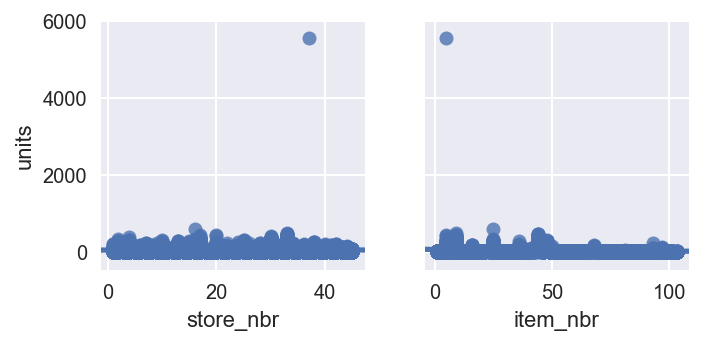

In [67]:
sns.pairplot(wal_train_1, x_vars=["store_nbr", "item_nbr"], y_vars=["units"],kind="reg")

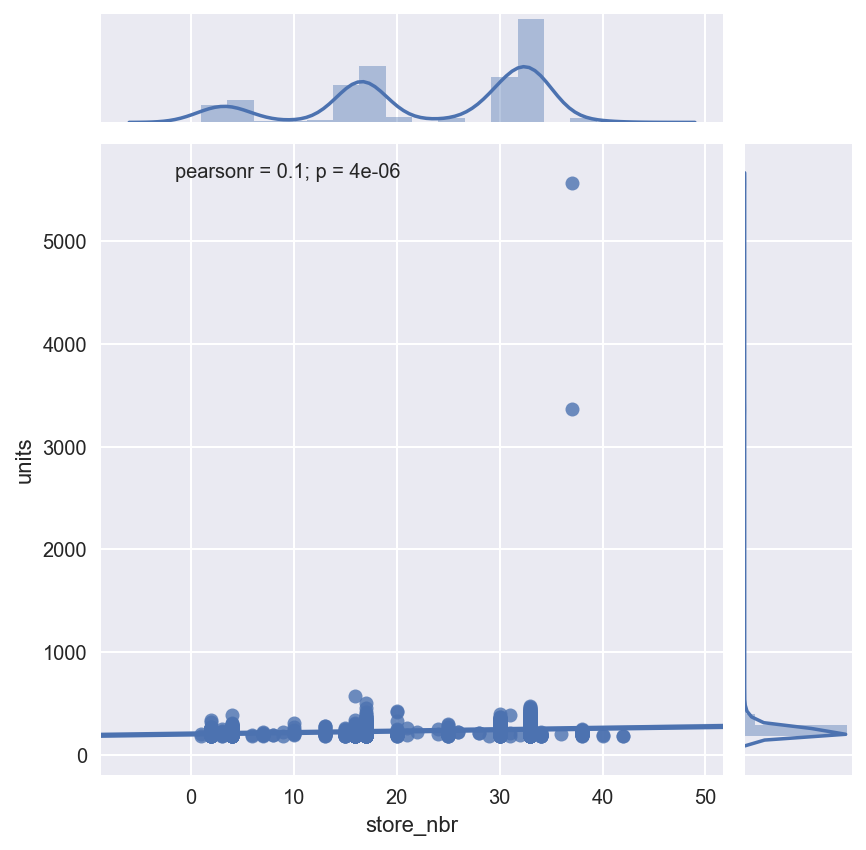

In [10]:
sns.jointplot("store_nbr", "units", data=wal, kind="reg")

In [57]:
wal1 = pd.read_csv('weather.csv')
wal_weather = wal1.loc[:8967]
wal_weather

station_nbr        date tmax tmin tavg depart dewpoint wetbulb heat  \
0               1  2012-01-01   52   31   42      M       36      40   23   
1               2  2012-01-01   48   33   41     16       37      39   24   
2               3  2012-01-01   55   34   45      9       24      36   20   
3               4  2012-01-01   63   47   55      4       28      43   10   
4               6  2012-01-01   63   34   49      0       31      43   16   
5               7  2012-01-01   50   33   42      M       26      35   23   
6               8  2012-01-01   66   45    M      M       34      46    M   
7               9  2012-01-01   34   19   27      M       17      23   38   
8              10  2012-01-01   73   53   63      M       55      58    2   
9              11  2012-01-01   72   48   60      7       54      56    5   
10             12  2012-01-01   72   48   60      M       54      57    5   
11             13  2012-01-01   38   18   28      M       12      21   37   
12             14  2012-01-01   50   34   42      5       25      35   23   
13             15  2012-01-01   48   26   37     16       35      38   28   
14             16  2012-01-01   50   30   40      M       37      40   25   
15             17  2012-01-01   56   38   47      M       23      37   18   
16             18  2012-01-01   59   40   50      4       28      40   15   
17             19  2012-01-01   38   25   32     10       26      30   33   
18             20  2012-01-01   59   41   50      M       28      40   15   
19              1  2012-01-02   50   31   41      M       26      35   24   
20              2  2012-01-02   46   28   37     12       24      32   28   
21              3  2012-01-02   45   24   35     -1       11      28   30   
22              4  2012-01-02   60   37   49     -2       26      39   16   
23              6  2012-01-02   60   30   45     -4       27      38   20   
24              7  2012-01-02   44   26   35      M       17      29   30   
25              8  2012-01-02   59   36    M      M       29      40    M   
26              9  2012-01-02   21   11   16      M        8      15   49   
27             10  2012-01-02   65   45   55      M       33      46   10   
28             11  2012-01-02   63   40   52     -1       31      44   13   
29             12  2012-01-02   65   47   56      M       33      46    9   
...           ...         ...  ...  ...  ...    ...      ...     ...  ...   
8938           11  2013-03-30   77   41   59     -5       41      50    6   
8939           12  2013-03-30   78   44   61      M       43      52    4   
8940           13  2013-03-30   65   34   50      M       29      40   15   
8941           14  2013-03-30   81   53   67     12       54      59    0   
8942           15  2013-03-30   55   26   41      3       20      33   24   
8943           16  2013-03-30   54   30   42      M       27      37   23   
8944           17  2013-03-30   77   54   66      M       54      58    0   
8945           18  2013-03-30   78   57   68      6       58      62    0   
8946           19  2013-03-30   57   28   43      3       30      39   22   
8947           20  2013-03-30   78   55   67      M       58      62    0   
8948            1  2013-03-31   62   29   46      M       25      38   19   
8949            2  2013-03-31   55   31    M      M        M       M    M   
8950            3  2013-03-31   71   50   61      5       46      53    4   
8951            4  2013-03-31   80   65   73      8       62      65    0   
8952            5  2013-03-31    M    M    M      M        M       M    M   
8953            6  2013-03-31   77   57   67      4       62      64    0   
8954            7  2013-03-31   70   49   60      M       43      51    5   
8955            8  2013-03-31   85   69   77      M       66       M    0   
8956            9  2013-03-31   41   24   33      M       22      30   32   
8957           10  2013-03-31   81   58   70      M       50      58    0   
89

In [58]:
len(wal_weather)

8968

In [61]:
wal_weather_1 = wal_weather[wal_weather > 0]
wal_weather_1.dropna(how='any')

station_nbr        date tmax tmin tavg depart dewpoint wetbulb heat  \
0               1  2012-01-01   52   31   42      M       36      40   23   
1               2  2012-01-01   48   33   41     16       37      39   24   
2               3  2012-01-01   55   34   45      9       24      36   20   
3               4  2012-01-01   63   47   55      4       28      43   10   
4               6  2012-01-01   63   34   49      0       31      43   16   
5               7  2012-01-01   50   33   42      M       26      35   23   
6               8  2012-01-01   66   45    M      M       34      46    M   
7               9  2012-01-01   34   19   27      M       17      23   38   
8              10  2012-01-01   73   53   63      M       55      58    2   
9              11  2012-01-01   72   48   60      7       54      56    5   
10             12  2012-01-01   72   48   60      M       54      57    5   
11             13  2012-01-01   38   18   28      M       12      21   37   
12             14  2012-01-01   50   34   42      5       25      35   23   
13             15  2012-01-01   48   26   37     16       35      38   28   
14             16  2012-01-01   50   30   40      M       37      40   25   
15             17  2012-01-01   56   38   47      M       23      37   18   
16             18  2012-01-01   59   40   50      4       28      40   15   
17             19  2012-01-01   38   25   32     10       26      30   33   
18             20  2012-01-01   59   41   50      M       28      40   15   
19              1  2012-01-02   50   31   41      M       26      35   24   
20              2  2012-01-02   46   28   37     12       24      32   28   
21              3  2012-01-02   45   24   35     -1       11      28   30   
22              4  2012-01-02   60   37   49     -2       26      39   16   
23              6  2012-01-02   60   30   45     -4       27      38   20   
24              7  2012-01-02   44   26   35      M       17      29   30   
25              8  2012-01-02   59   36    M      M       29      40    M   
26              9  2012-01-02   21   11   16      M        8      15   49   
27             10  2012-01-02   65   45   55      M       33      46   10   
28             11  2012-01-02   63   40   52     -1       31      44   13   
29             12  2012-01-02   65   47   56      M       33      46    9   
...           ...         ...  ...  ...  ...    ...      ...     ...  ...   
8938           11  2013-03-30   77   41   59     -5       41      50    6   
8939           12  2013-03-30   78   44   61      M       43      52    4   
8940           13  2013-03-30   65   34   50      M       29      40   15   
8941           14  2013-03-30   81   53   67     12       54      59    0   
8942           15  2013-03-30   55   26   41      3       20      33   24   
8943           16  2013-03-30   54   30   42      M       27      37   23   
8944           17  2013-03-30   77   54   66      M       54      58    0   
8945           18  2013-03-30   78   57   68      6       58      62    0   
8946           19  2013-03-30   57   28   43      3       30      39   22   
8947           20  2013-03-30   78   55   67      M       58      62    0   
8948            1  2013-03-31   62   29   46      M       25      38   19   
8949            2  2013-03-31   55   31    M      M        M       M    M   
8950            3  2013-03-31   71   50   61      5       46      53    4   
8951            4  2013-03-31   80   65   73      8       62      65    0   
8952            5  2013-03-31    M    M    M      M        M       M    M   
8953            6  2013-03-31   77   57   67      4       62      64    0   
8954            7  2013-03-31   70   49   60      M       43      51    5   
8955            8  2013-03-31   85   69   77      M       66       M    0   
8956            9  2013-03-31   41   24   33      M       22      30   32   
8957           10  2013-03-31   81   58   70      M       50      58    0   
89

In [63]:
wal_key = pd.read_csv('key.csv')
wal_stn = wal_key.sort_values(by=['station_nbr']).reset_index(drop=True)
wal_stn

store_nbr  station_nbr
0           1            1
1          16            2
2          29            3
3          21            3
4          33            3
5           8            4
6          35            5
7          13            6
8           7            6
9           3            7
10         28            7
11         20            7
12         39            8
13         24            9
14          4            9
15         11           10
16         27           10
17         22           10
18         43           11
19         12           11
20         44           12
21         41           12
22          5           12
23         10           12
24         40           13
25         25           13
26         15           13
27         37           13
28         32           13
29         42           14
30          2           14
31         38           14
32          6           14
33         19           15
34         45           16
35         14           16
36         31           17
37         26           17
38         18           17
39          9           17
40         34           17
41         23           17
42         36           18
43         30           19
44         17           20

In [64]:
mg_str = pd.merge(wal_stn, wal_train)
mg_str

store_nbr  station_nbr        date  item_nbr  units
0                1            1  2012-01-01         1      0
1                1            1  2012-01-01         2      0
2                1            1  2012-01-01         3      0
3                1            1  2012-01-01         4      0
4                1            1  2012-01-01         5      0
5                1            1  2012-01-01         6      0
6                1            1  2012-01-01         7      0
7                1            1  2012-01-01         8      0
8                1            1  2012-01-01         9     29
9                1            1  2012-01-01        10      0
10               1            1  2012-01-01        11      0
11               1            1  2012-01-01        12      0
12               1            1  2012-01-01        13      0
13               1            1  2012-01-01        14      0
14               1            1  2012-01-01        15      0
15               1            1  2012-01-01        16      0
16               1            1  2012-01-01        17      0
17               1            1  2012-01-01        18      0
18               1            1  2012-01-01        19      0
19               1            1  2012-01-01        20      0
20               1            1  2012-01-01        21      0
21               1            1  2012-01-01        22      0
22               1            1  2012-01-01        23      0
23               1            1  2012-01-01        24      0
24               1            1  2012-01-01        25      0
25               1            1  2012-01-01        26      0
26               1            1  2012-01-01        27      0
27               1            1  2012-01-01        28      2
28               1            1  2012-01-01        29      0
29               1            1  2012-01-01        30      0
...            ...          ...         ...       ...    ...
2255823         17           20  2013-03-31        82      0
2255824         17           20  2013-03-31        83      0
2255825         17           20  2013-03-31        84      0
2255826         17           20  2013-03-31        85      0
2255827         17           20  2013-03-31        86      0
2255828         17           20  2013-03-31        87      0
2255829         17           20  2013-03-31        88      0
2255830         17           20  2013-03-31        89      0
2255831         17           20  2013-03-31        90      0
2255832         17           20  2013-03-31        91      0
2255833         17           20  2013-03-31        92      0
2255834         17           20  2013-03-31        93      0
2255835         17           20  2013-03-31        94      0
2255836         17           20  2013-03-31        95      0
2255837         17           20  2013-03-31        96      0
2255838         17           20  2013-03-31        97      0
2255839         17           20  2013-03-31        98      0
2255840         17           20  2013-03-31        99      0
2255841         17           20  2013-03-31       100      0
2255842         17           20  2013-03-31       101      0
2255843         17           20  2013-03-31       102      0
2255844         17           20  2013-03-31       103      0
2255845         17           20  2013-03-31       104      0
2255846         17           20  2013-03-31       105      0
2255847         17           20  2013-03-31       106      0
2255848         17           20  2013-03-31       107      0
2255849         17           20  2013-03-31       108      0
2255850         17           20  2013-03-31       109      0
2255851         17           20  2013-03-31       110      0
2255852         17           20  2013-03-31       111      0

[2255853 rows x 5 columns]

In [66]:
mg_str_1 = mg_str[mg_str > 0]
mg_str_1.dropna(how='any')

store_nbr  station_nbr        date  item_nbr  units
8                1            1  2012-01-01         9   29.0
27               1            1  2012-01-01        28    2.0
50               1            1  2012-01-01        51    1.0
119              1            1  2012-01-02         9   60.0
138              1            1  2012-01-02        28    5.0
161              1            1  2012-01-02        51    1.0
230              1            1  2012-01-03         9   15.0
249              1            1  2012-01-03        28    9.0
341              1            1  2012-01-04         9   20.0
360              1            1  2012-01-04        28    3.0
452              1            1  2012-01-05         9   16.0
471              1            1  2012-01-05        28    1.0
563              1            1  2012-01-06         9   12.0
582              1            1  2012-01-06        28    2.0
674              1            1  2012-01-07         9    2.0
693              1            1  2012-01-07        28    1.0
785              1            1  2012-01-08         9   22.0
804              1            1  2012-01-08        28    4.0
827              1            1  2012-01-08        51    1.0
896              1            1  2012-01-09         9   50.0
915              1            1  2012-01-09        28    1.0
938              1            1  2012-01-09        51    1.0
1007             1            1  2012-01-10         9   25.0
1118             1            1  2012-01-11         9   26.0
1137             1            1  2012-01-11        28    1.0
1149             1            1  2012-01-11        40    4.0
1160             1            1  2012-01-11        51    3.0
1229             1            1  2012-01-12         9   32.0
1248             1            1  2012-01-12        28    2.0
1271             1            1  2012-01-12        51    4.0
...            ...          ...         ...       ...    ...
2254862         17           20  2013-03-23         9   91.0
2254890         17           20  2013-03-23        37   61.0
2254901         17           20  2013-03-23        48  102.0
2254973         17           20  2013-03-24         9   99.0
2255001         17           20  2013-03-24        37   90.0
2255012         17           20  2013-03-24        48  115.0
2255035         17           20  2013-03-24        71    4.0
2255084         17           20  2013-03-25         9   86.0
2255112         17           20  2013-03-25        37   60.0
2255123         17           20  2013-03-25        48  107.0
2255195         17           20  2013-03-26         9   70.0
2255223         17           20  2013-03-26        37   49.0
2255234         17           20  2013-03-26        48   75.0
2255257         17           20  2013-03-26        71    1.0
2255306         17           20  2013-03-27         9   39.0
2255334         17           20  2013-03-27        37   51.0
2255345         17           20  2013-03-27        48   93.0
2255417         17           20  2013-03-28         9   62.0
2255445         17           20  2013-03-28        37   50.0
2255456         17           20  2013-03-28        48  102.0
2255528         17           20  2013-03-29         9   27.0
2255556         17           20  2013-03-29        37   66.0
2255567         17           20  2013-03-29        48  112.0
2255639         17           20  2013-03-30         9   98.0
2255667         17           20  2013-03-30        37   84.0
2255678         17           20  2013-03-30        48  122.0
2255750         17           20  2013-03-31         9  114.0
2255778         17           20  2013-03-31        37   61.0
2255789         17           20  2013-03-31        48  124.0
2255812         17           20  2013-03-31        71    2.0

[61318 rows x 5 columns]

In [ ]:
mg_str.groupby

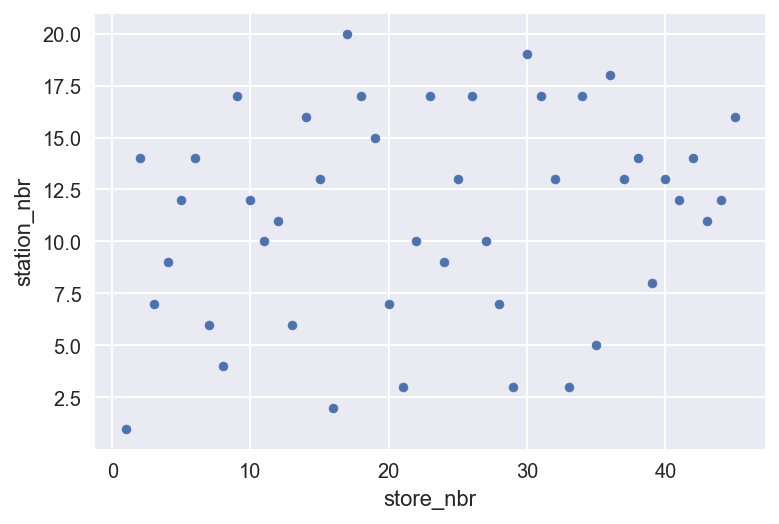

In [20]:
wal4.plot.scatter(x='store_nbr', y='station_nbr')
plt.show()

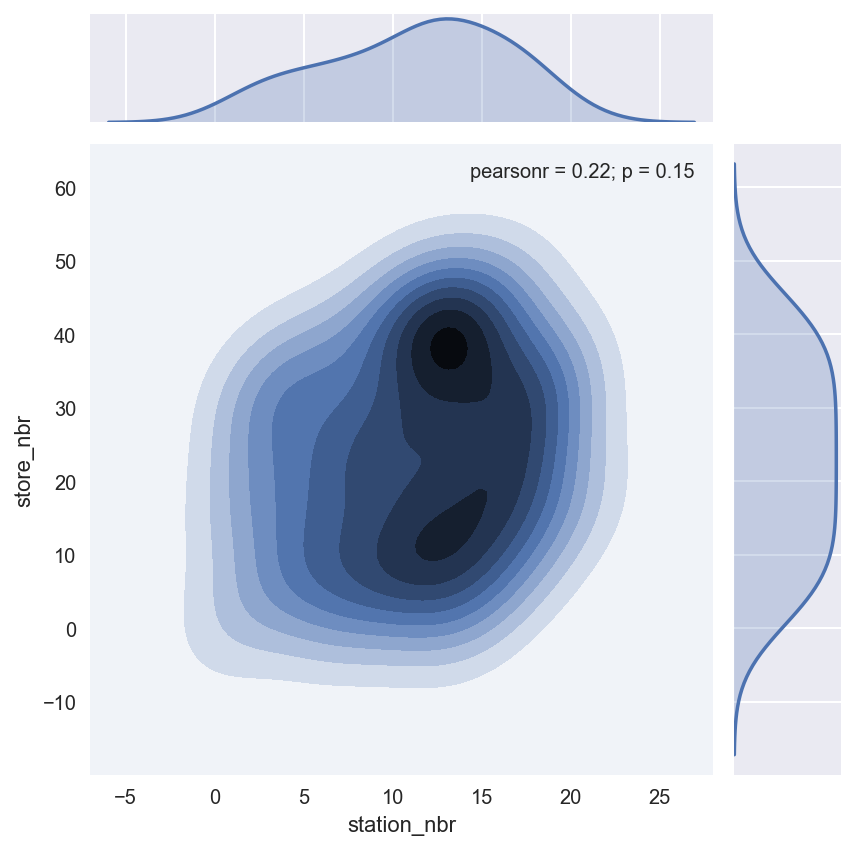

In [8]:
sns.jointplot("station_nbr", "store_nbr", data=wal4, kind="kde")

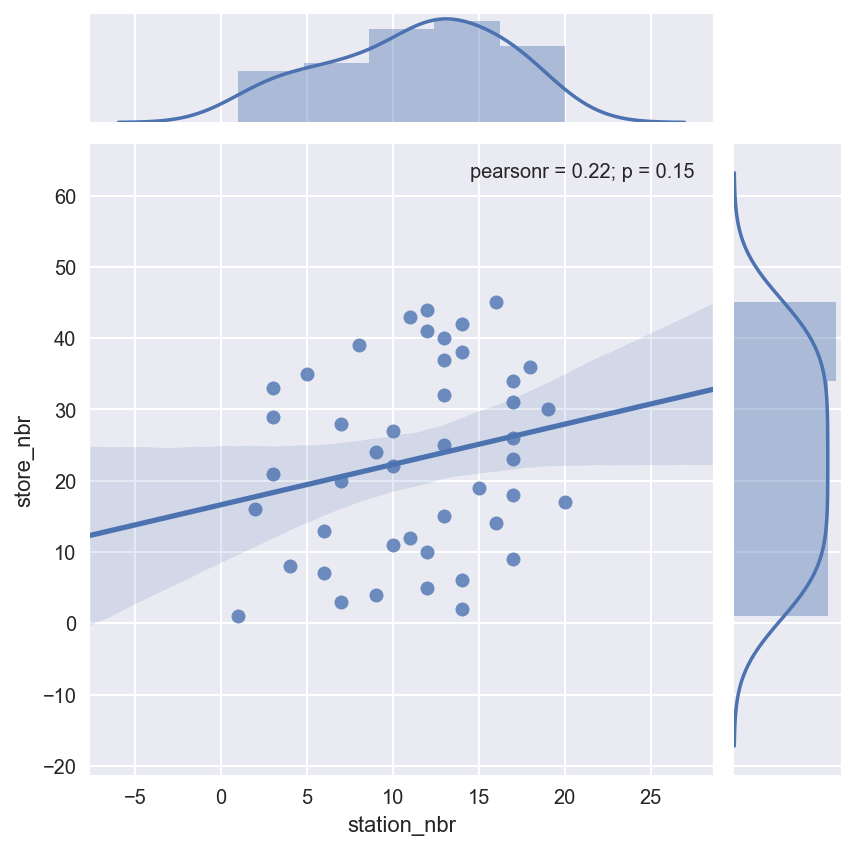

In [5]:
sns.jointplot("station_nbr", "store_nbr", data=wal4, kind="reg")

In [52]:
wal2 = pd.read_csv('test.csv')
wal2.head()

date  store_nbr  item_nbr
0  2013-04-01          2         1
1  2013-04-01          2         2
2  2013-04-01          2         3
3  2013-04-01          2         4
4  2013-04-01          2         5

In [65]:
wal5 = pd.read_csv('sampleSubmission.csv')
wal5.head(112)

id  units
0      2_1_2013-04-01      0
1      2_2_2013-04-01      0
2      2_3_2013-04-01      0
3      2_4_2013-04-01      0
4      2_5_2013-04-01      0
5      2_6_2013-04-01      0
6      2_7_2013-04-01      0
7      2_8_2013-04-01      0
8      2_9_2013-04-01      0
9     2_10_2013-04-01      0
10    2_11_2013-04-01      0
11    2_12_2013-04-01      0
12    2_13_2013-04-01      0
13    2_14_2013-04-01      0
14    2_15_2013-04-01      0
15    2_16_2013-04-01      0
16    2_17_2013-04-01      0
17    2_18_2013-04-01      0
18    2_19_2013-04-01      0
19    2_20_2013-04-01      0
20    2_21_2013-04-01      0
21    2_22_2013-04-01      0
22    2_23_2013-04-01      0
23    2_24_2013-04-01      0
24    2_25_2013-04-01      0
25    2_26_2013-04-01      0
26    2_27_2013-04-01      0
27    2_28_2013-04-01      0
28    2_29_2013-04-01      0
29    2_30_2013-04-01      0
..                ...    ...
82    2_83_2013-04-01      0
83    2_84_2013-04-01      0
84    2_85_2013-04-01      0
85    2_86_2013-04-01      0
86    2_87_2013-04-01      0
87    2_88_2013-04-01      0
88    2_89_2013-04-01      0
89    2_90_2013-04-01      0
90    2_91_2013-04-01      0
91    2_92_2013-04-01      0
92    2_93_2013-04-01      0
93    2_94_2013-04-01      0
94    2_95_2013-04-01      0
95    2_96_2013-04-01      0
96    2_97_2013-04-01      0
97    2_98_2013-04-01      0
98    2_99_2013-04-01      0
99   2_100_2013-04-01      0
100  2_101_2013-04-01      0
101  2_102_2013-04-01      0
102  2_103_2013-04-01      0
103  2_104_2013-04-01      0
104  2_105_2013-04-01      0
105  2_106_2013-04-01      0
106  2_107_2013-04-01      0
107  2_108_2013-04-01      0
108  2_109_2013-04-01      0
109  2_110_2013-04-01      0
110  2_111_2013-04-01      0
111    3_1_2013-04-01      0

[112 rows x 2 columns]

In [10]:
len(wal5)

526917

In [65]:
mg = pd.read_csv('file_name.csv')
mg.sort_values(by=['station_nbr'], ascending=True).reset_index(drop=True)

date  store_nbr  item_nbr  units  station_nbr tmax tmin tavg  \
0       2013-03-06          1        28      5            1   40   34   37   
1       2014-06-11          1        28      3            1   72   52   62   
2       2014-06-11          1        47      6            1   72   52   62   
3       2014-06-11          1         9      9            1   72   52   62   
4       2012-12-01          1        28      8            1   29   25   27   
5       2012-12-01          1         9     53            1   29   25   27   
6       2014-06-09          1        47      3            1   80   61   71   
7       2014-06-09          1         9      9            1   80   61   71   
8       2014-06-09          1        28      9            1   80   61   71   
9       2012-09-08          1         9     46            1   85   65   75   
10      2012-09-08          1        28      4            1   85   65   75   
11      2012-09-08          1        93      3            1   85   65   75   
12      2014-01-10          1        99      1            1   37   12   25   
13      2014-01-10          1        51      2            1   37   12   25   
14      2014-01-10          1        47      2            1   37   12   25   
15      2014-01-10          1         9      3            1   37   12   25   
16      2014-01-10          1        28      9            1   37   12   25   
17      2013-10-26          1        99      4            1   56   30   43   
18      2013-10-26          1        28      5            1   56   30   43   
19      2013-10-26          1        47     13            1   56   30   43   
20      2013-10-26          1         9     39            1   56   30   43   
21      2014-08-31          1        47      7            1   84   65   75   
22      2014-08-31          1        28      7            1   84   65   75   
23      2014-08-31          1         9      7            1   84   65   75   
24      2014-08-31          1        99      9            1   84   65   75   
25      2013-05-11          1         9     61            1   71   60   66   
26      2013-02-10          1        93      4            1   39   11   25   
27      2013-05-11          1        28     17            1   71   60   66   
28      2013-05-11          1        89      2            1   71   60   66   
29      2013-12-14          1         9     22            1   18    9   14   
...            ...        ...       ...    ...          ...  ...  ...  ...   
118666  2013-10-04         17         9    225           20   89   74   82   
118667  2012-03-30         17        48    141           20   81   67   74   
118668  2013-06-08         17        71      1           20   88   60   74   
118669  2012-11-23         17        48     78           20   68   44   56   
118670  2014-10-03         17        37     43           20   83   58   71   
118671  2012-07-09         17         9    224           20   97   75   86   
118672  2012-07-09         17        37     67           20   97   75   86   
118673  2013-03-26         17        71      1           20   59   31   45   
118674  2013-03-26         17        37     49           20   59   31   45   
118675  2013-03-26         17         9     70           20   59   31   45   
118676  2013-03-26         17        48     75           20   59   31   45   
118677  2012-12-21         17        37     51           20   66   30   48   
118678  2012-11-03         17         9    101           20   85   61   73   
118679  2012-11-03         17        37    102           20   85   61   73   
118680  2012-11-03         17        48    224           20   85   61   73   
118681  2012-03-26         17        71      2           20   83   60   72   
118682  2013-10-02         17        37     50           20   89   74   82   
118683  2013-10-02         17         9    130           20   89   74   82   
118684  2014-06-02         17        37     46           20   92   74   83   
118685  2014-06-02         17       

In [66]:
# 'M', 'T' 값 삭제
mg = mg[mg != 'M']
mg = mg[mg != 'T']

mg = mg.dropna(how='any')
mg

date  store_nbr  item_nbr  units  station_nbr tmax tmin tavg  \
37      2012-10-28         16        25    577            2   51   47   49   
38      2012-10-28         16        16    175            2   51   47   49   
39      2012-10-28         16        93     13            2   51   47   49   
40      2012-10-28         16        39      1            2   51   47   49   
41      2012-10-28         16        50      1            2   51   47   49   
42      2012-10-28         16        85      1            2   51   47   49   
46      2012-08-05         33         9    476            3   96   73   85   
47      2012-08-05         33        44    424            3   96   73   85   
48      2012-08-05         21        44    159            3   96   73   85   
49      2012-08-05         29        45    139            3   96   73   85   
50      2012-08-05         21         5    108            3   96   73   85   
51      2012-08-05         29        41     54            3   96   73   85   
52      2012-08-05         29         8     50            3   96   73   85   
53      2012-08-05         33        92      3            3   96   73   85   
54      2012-09-01         33        44    469            3   99   77   88   
55      2012-09-01         33         9    197            3   99   77   88   
56      2012-09-01         21        44    132            3   99   77   88   
57      2012-09-01         29        45    100            3   99   77   88   
58      2012-09-01         29        41     38            3   99   77   88   
59      2012-09-01         21         5     38            3   99   77   88   
60      2012-09-01         29         8     14            3   99   77   88   
61      2012-09-01         21        91     11            3   99   77   88   
62      2012-09-01         33        92      3            3   99   77   88   
67      2012-08-01         33        44    460            3  112   83   98   
68      2012-08-01         33         9    356            3  112   83   98   
69      2012-08-01         21        44    122            3  112   83   98   
70      2012-08-01         29        45     80            3  112   83   98   
71      2012-08-01         21         5     77            3  112   83   98   
72      2012-08-01         29         8     56            3  112   83   98   
73      2012-08-01         29        41     56            3  112   83   98   
...            ...        ...       ...    ...          ...  ...  ...  ...   
118153  2012-02-14          8        59      3            4   73   42   58   
118162  2012-05-13         19        83      6           15   84   43   64   
118163  2012-05-13         19        16      5           15   84   43   64   
118176  2014-04-14         19        16      6           15   79   38   59   
118177  2014-04-14         19        83      4           15   79   38   59   
118188  2014-04-15         19        83      6           15   64   33   49   
118189  2014-04-15         19        16      4           15   64   33   49   
118190  2012-03-28         19        16      6           15   46   30   38   
118191  2012-03-28         19        83      5           15   46   30   38   
118192  2012-03-28         19        69      2           15   46   30   38   
118197  2013-03-19         19        16      6           15   32   23   28   
118198  2013-03-19         19        75      2           15   32   23   28   
118233  2012-01-24         19        83      5           15   49   31   40   
118234  2012-01-24         19        16      3           15   49   31   40   
118235  2012-01-24         19        69      2           15   49   31   40   
118236  2012-01-24         19        93      1           15   49   31   40   
118237  2012-01-24         19        39      1           15   49   31   40   
118253  2013-03-27         19        16      5           15   53   22   38   
118254  2013-03-27         19        83      4           15   53   22   38   
118255  2013-03-27         19       

In [67]:
type(mg) 

pandas.core.frame.DataFrame

In [68]:
# codesum 컬럼 삭제
mg = mg.drop('codesum', axis=1)
mg

date  store_nbr  item_nbr  units  station_nbr tmax tmin tavg  \
37      2012-10-28         16        25    577            2   51   47   49   
38      2012-10-28         16        16    175            2   51   47   49   
39      2012-10-28         16        93     13            2   51   47   49   
40      2012-10-28         16        39      1            2   51   47   49   
41      2012-10-28         16        50      1            2   51   47   49   
42      2012-10-28         16        85      1            2   51   47   49   
46      2012-08-05         33         9    476            3   96   73   85   
47      2012-08-05         33        44    424            3   96   73   85   
48      2012-08-05         21        44    159            3   96   73   85   
49      2012-08-05         29        45    139            3   96   73   85   
50      2012-08-05         21         5    108            3   96   73   85   
51      2012-08-05         29        41     54            3   96   73   85   
52      2012-08-05         29         8     50            3   96   73   85   
53      2012-08-05         33        92      3            3   96   73   85   
54      2012-09-01         33        44    469            3   99   77   88   
55      2012-09-01         33         9    197            3   99   77   88   
56      2012-09-01         21        44    132            3   99   77   88   
57      2012-09-01         29        45    100            3   99   77   88   
58      2012-09-01         29        41     38            3   99   77   88   
59      2012-09-01         21         5     38            3   99   77   88   
60      2012-09-01         29         8     14            3   99   77   88   
61      2012-09-01         21        91     11            3   99   77   88   
62      2012-09-01         33        92      3            3   99   77   88   
67      2012-08-01         33        44    460            3  112   83   98   
68      2012-08-01         33         9    356            3  112   83   98   
69      2012-08-01         21        44    122            3  112   83   98   
70      2012-08-01         29        45     80            3  112   83   98   
71      2012-08-01         21         5     77            3  112   83   98   
72      2012-08-01         29         8     56            3  112   83   98   
73      2012-08-01         29        41     56            3  112   83   98   
...            ...        ...       ...    ...          ...  ...  ...  ...   
118153  2012-02-14          8        59      3            4   73   42   58   
118162  2012-05-13         19        83      6           15   84   43   64   
118163  2012-05-13         19        16      5           15   84   43   64   
118176  2014-04-14         19        16      6           15   79   38   59   
118177  2014-04-14         19        83      4           15   79   38   59   
118188  2014-04-15         19        83      6           15   64   33   49   
118189  2014-04-15         19        16      4           15   64   33   49   
118190  2012-03-28         19        16      6           15   46   30   38   
118191  2012-03-28         19        83      5           15   46   30   38   
118192  2012-03-28         19        69      2           15   46   30   38   
118197  2013-03-19         19        16      6           15   32   23   28   
118198  2013-03-19         19        75      2           15   32   23   28   
118233  2012-01-24         19        83      5           15   49   31   40   
118234  2012-01-24         19        16      3           15   49   31   40   
118235  2012-01-24         19        69      2           15   49   31   40   
118236  2012-01-24         19        93      1           15   49   31   40   
118237  2012-01-24         19        39      1           15   49   31   40   
118253  2013-03-27         19        16      5           15   53   22   38   
118254  2013-03-27         19        83      4           15   53   22   38   
118255  2013-03-27         19       

In [69]:
type(mg) 

pandas.core.frame.DataFrame

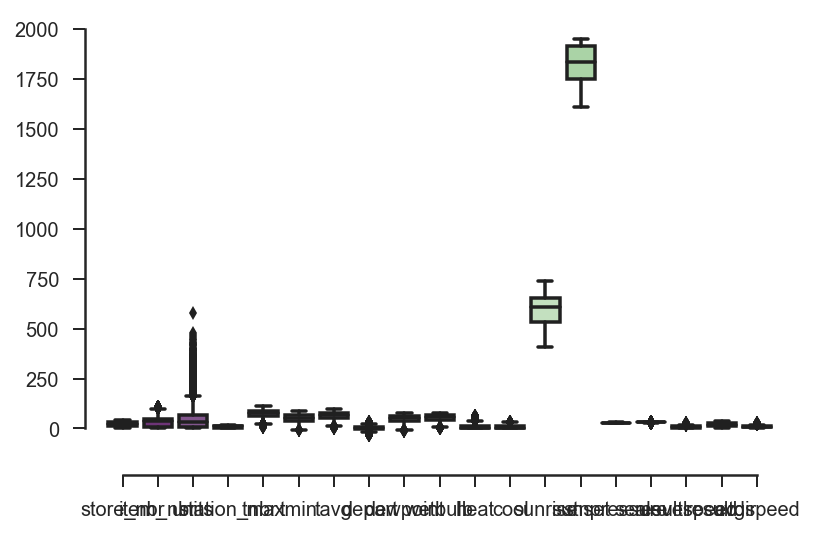

In [82]:
import seaborn as sns
sns.set(style="ticks")
# Draw a nested boxplot to show bills by day and sex
sns.boxplot(data=mg, palette="PRGn")
sns.despine(offset=10, trim=True)

In [ ]:
def to_float(series, replace_value_for_M, replace_value_for_T):
    series = series.map(lambda s : s.strip())
    series[series == 'M'] = replace_value_for_M
    series[series == 'T'] = replace_value_for_T
    return series.astype(float)

In [ ]:
# store_item_nbrs_path = 'model/store_item_nbrs.csv'
# store_item_nbrs = pd.read_csv(store_item_nbrs_path)
# valid_store_items = set(zip(store_item_nbrs.store_nbr, store_item_nbrs.item_nbr))